In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model, metrics
from sklearn.model_selection import cross_val_score

import matplotlib
from matplotlib import pyplot as plt

def forma(x):
    x = [float(i.replace(',','.')) for i in  x.values]
    return x

def scale(x):
    x_mean = np.mean(x)
    x_std  = np.std(x)
    x_scaled = (x - x_mean)/x_std
    return x_scaled

def norm_scale(x):
    min = np.min(x)
    max = np.max(x)
    x_scaled = (x - min) / (max - min)
    return x_scaled

In [2]:
df = pd.read_csv('/content/Compare_ACE_DSCOVR.csv', sep=';')

df['B_x'] = df.shift(periods=21, fill_value=np.nan)['B_x']
df['B_gsm_y'] = df.shift(periods=11, fill_value=np.nan)['B_gsm_y']
df['B_gsm_z'] = df.shift(periods=3, fill_value=np.nan)['B_gsm_z']
df['B_magn'] = df.shift(periods=14, fill_value=np.nan)['B_magn']
df['H_den_SWP'] = df.shift(periods=10, fill_value=np.nan)['H_den_SWP']
df['SW_spd'] = df.shift(periods=55, fill_value=np.nan)['SW_spd']

values = ('B_x', 'B_gsm_y', 'B_gsm_z', 'B_magn', 'H_den_SWP', 'SW_spd')

for elem in values:
    df = df.drop(df[df[elem] == 'N'].index)
    df = df.dropna()

df_dst = df['Dst']

for elem in values:
    data = forma(df[elem])
    df[elem] = data

for elem in values:
    data = norm_scale(df[elem])
    df[elem] = data

dataset = pd.DataFrame({elem:df[elem] for elem in values}).to_numpy()

In [18]:
x_train, x_test, y_train, y_test = train_test_split(dataset, df_dst, test_size=0.3)

model = linear_model.LinearRegression()
model.fit(x_train, y_train)
print('Coefficients:', model.coef_)
print('Intercept', model.intercept_)
print('Variance score:', model.score(x_test, y_test))  # дисперсия
print()

y_pred = model.predict(x_test)

print('R**2 score:', metrics.r2_score(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

# # Calculation of R2 Score
# print(cross_val_score(model, dataset, df_dst, cv=10, scoring="r2").mean())

Coefficients: [-1.23583766e-01 -7.01243100e+00  3.12607755e+02 -1.78549842e+02
 -2.64248780e+00 -9.34217170e+01]
Intercept -112.09489311278413
Variance score: 0.41867726990236653

R**2 score: 0.41867726990236653
MSE: 216.2716491692224
MAE: 10.009979482919203


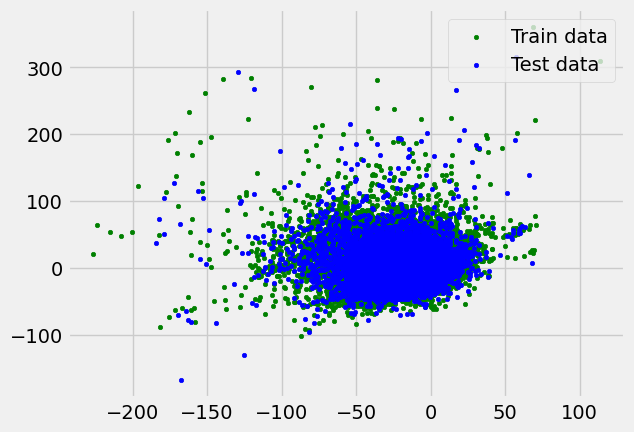

In [23]:
# plotting residual errors in training data
plt.scatter(model.predict(x_train),
            model.predict(x_train) - y_train,
            color="green", s=10,
            label='Train data')

# plotting residual errors in test data
plt.scatter(y_pred, y_pred - y_test,
            color="blue", s=10,
            label='Test data')

plt.legend(loc='upper right')
plt.show()